In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Découverte du dataset

In [7]:
# -1 Importez le dataset et affichez ses premières lignes. 
data = pd.read_csv(r"spotify_churn_dataset.csv")
data.head()

,user_id,subscription_type,country,avg_daily_minutes,number_of_playlists,top_genre,skips_per_day,support_tickets,days_since_last_login,churned
0,user_1,Premium,US,134.9,4,Electronic,6,0,1,0
1,user_2,Premium,PK,165.7,5,Pop,8,0,12,0
2,user_3,Free,DE,45.9,3,Classical,3,0,3,0
3,user_4,Premium,PK,106.0,0,Jazz,7,0,3,0
4,user_5,Premium,US,89.6,5,Country,2,1,6,0


# 2. Décrivez le dataset : 
## Description des variables

**user_id**  
Identifiant unique de l’utilisateur (juste pour reconnaître chaque client).

**subscription_type**  
Type d’abonnement de l’utilisateur : *Free* ou *Premium*.

**country**  
Pays de résidence de l’utilisateur.

**avg_daily_minutes**  
Nombre moyen de minutes d’écoute par jour (niveau d’activité sur Spotify).

**number_of_playlists**  
Nombre de playlists créées par l’utilisateur.

**top_genre**  
Genre musical le plus écouté par l’utilisateur (Pop, Jazz, Classical, etc.).

**skips_per_day**  
Nombre moyen de morceaux sautés par jour (indique l’insatisfaction ou l’exploration).

**support_tickets**  
Nombre de tickets envoyés au support client (problèmes ou réclamations).

**days_since_last_login**  
Nombre de jours écoulés depuis la dernière connexion de l’utilisateur.

**churned**  
Variable cible :  
- `1` → l’utilisateur a quitté Spotify (churn)  
- `0` → l’utilisateur est toujours actif

In [18]:
# Décrivez le dataset :
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                1000 non-null   object 
 1   subscription_type      1000 non-null   object 
 2   country                1000 non-null   object 
 3   avg_daily_minutes      1000 non-null   float64
 4   number_of_playlists    1000 non-null   int64  
 5   top_genre              1000 non-null   object 
 6   skips_per_day          1000 non-null   int64  
 7   support_tickets        1000 non-null   int64  
 8   days_since_last_login  1000 non-null   int64  
 9   churned                1000 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 78.3+ KB


In [11]:
#3. Existe-t-il des valeurs manquantes ?  
data.isna().sum()

user_id                  0
subscription_type        0
country                  0
avg_daily_minutes        0
number_of_playlists      0
top_genre                0
skips_per_day            0
support_tickets          0
days_since_last_login    0
churned                  0
dtype: int64

In [13]:
# il n'existe aucune valeurs manquantes

## 2. Analyse des variables

In [15]:
#1-la description statistique pour chaque variable

In [16]:
data.describe()

,avg_daily_minutes,number_of_playlists,skips_per_day,support_tickets,days_since_last_login,churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,97.442100,3.434000,4.631000,0.232000,9.496000,0.186000
std,42.916587,2.324015,2.777148,0.514238,9.742017,0.389301
min,-37.200000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.900000,1.000000,3.000000,0.000000,2.000000,0.000000
50%,97.900000,3.000000,5.000000,0.000000,7.000000,0.000000
75%,129.750000,5.000000,6.000000,0.000000,14.000000,0.000000
max,237.800000,10.000000,14.000000,2.000000,58.000000,1.000000


## les variables explicatifs et la variable cible

## 🔹 Variables explicatives (indépendantes)

Les variables explicatives sont celles qui décrivent le comportement, l’activité et le profil de l’utilisateur, et qui peuvent influencer la décision de quitter ou non Spotify :

- **subscription_type** : type d’abonnement (Free / Premium)
- **country** : pays de résidence
- **avg_daily_minutes** : niveau d’activité quotidienne
- **number_of_playlists** : engagement de l’utilisateur
- **top_genre** : préférence musicale
- **skips_per_day** : niveau d’insatisfaction ou d’exploration
- **support_tickets** : nombre de problèmes rencontrés
- **days_since_last_login** : niveau d’inactivité

 **user_id** est exclue car elle sert uniquement à l’identification et n’apporte aucune information explicative.

---

##  Variable cible (dépendante / target)

- **churned**
  - `1` : l’utilisateur a quitté Spotify
  - `0` : l’utilisateur est toujours actif

---

## Justification du choix

La variable **churned** représente le phénomène à expliquer et à prédire : le départ d’un utilisateur.

Les variables explicatives décrivent les facteurs susceptibles d’influencer ce départ, notamment :
- l’engagement (temps d’écoute, playlists),
- l’insatisfaction (skips, tickets support),
- l’inactivité (jours depuis la dernière connexion),
- le profil de l’utilisateur (abonnement, pays, genre préféré).

Ainsi, le modèle cherchera à expliquer ou prédire la valeur de **churned** à partir des variables explicatives.


# 3. Visualisation des données 

##  Variables quantitatives

Les variables quantitatives sont celles qui prennent des valeurs numériques et qui permettent de mesurer une quantité ou une fréquence.

Dans ce dataset, les variables quantitatives sont :

- **avg_daily_minutes**  
  Nombre moyen de minutes d’écoute par jour.

- **number_of_playlists**  
  Nombre de playlists créées par l’utilisateur.

- **skips_per_day**  
  Nombre moyen de morceaux sautés par jour.

- **support_tickets**  
  Nombre de tickets envoyés au support client.

- **days_since_last_login**  
  Nombre de jours écoulés depuis la dernière connexion.

- **churned** *(variable quantitative discrète / binaire)*  
  - `1` : l’utilisateur a quitté Spotify  
  - `0` : l’utilisateur est toujours actif


## Histogrammes des variables quantitatives

Text(0.5, 1.0, 'avg_daily_minutes')

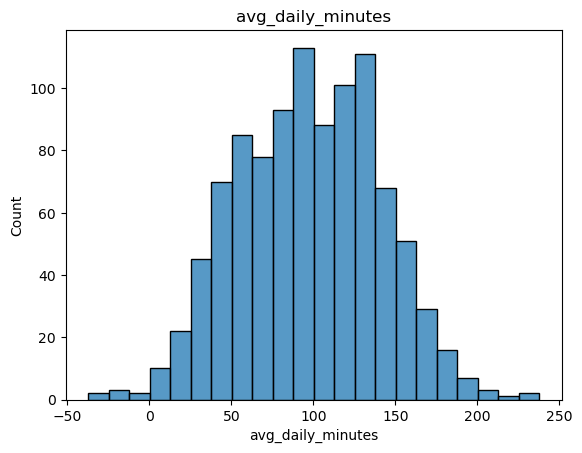

In [25]:
#avg_daily_minutes
sns.histplot(data = data , x = "avg_daily_minutes" )
plt.title("avg_daily_minutes")

Text(0.5, 1.0, 'number_of_playlists')

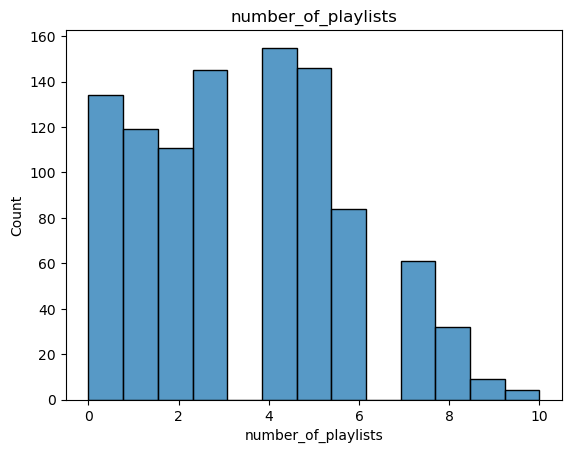

In [34]:
#number_of_playlists
sns.histplot(data = data , x = "number_of_playlists" )
plt.title("number_of_playlists")

Text(0.5, 1.0, 'skips_per_day')

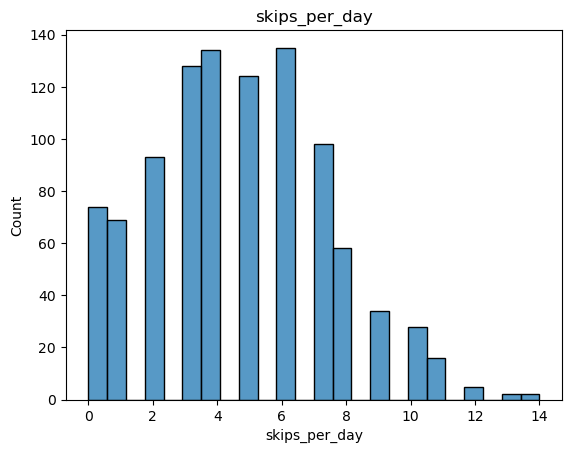

In [26]:
#skips_per_day
sns.histplot(data = data , x = "skips_per_day" )
plt.title("skips_per_day")

Text(0.5, 1.0, 'support_tickets')

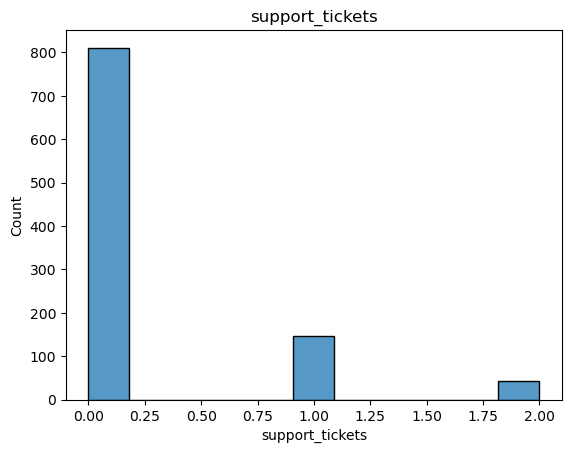

In [27]:
#support_tickets
sns.histplot(data = data , x = "support_tickets" )
plt.title("support_tickets")

Text(0.5, 1.0, 'days_since_last_login')

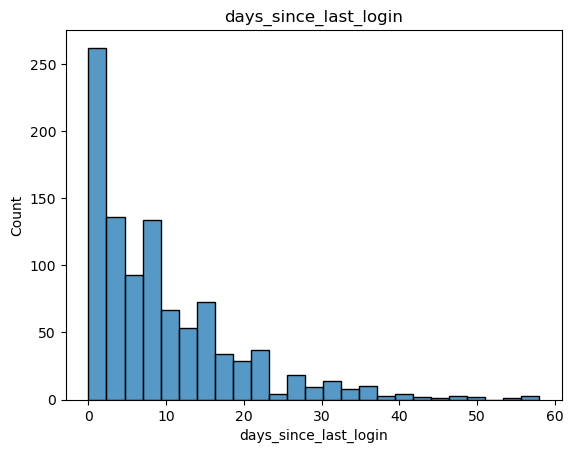

In [28]:
#days_since_last_login
sns.histplot(data = data , x = "days_since_last_login" )
plt.title("days_since_last_login")

Text(0.5, 1.0, 'churned')

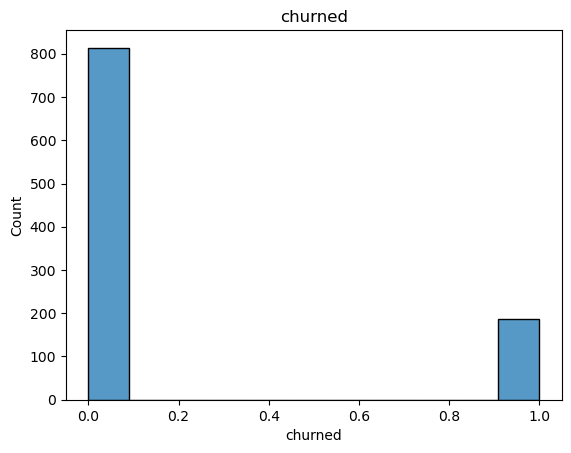

In [31]:
#churned
sns.histplot(data = data , x = "churned" )
plt.title("churned")

## Boxs plots pour detecter les valeurs aberrantes

Text(0.5, 1.0, 'avg_daily_minutes')

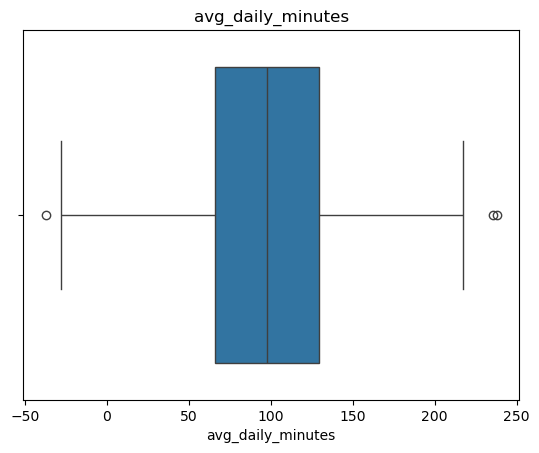

In [33]:
#avg_daily_minutes
sns.boxplot(data = data , x = "avg_daily_minutes" )
plt.title("avg_daily_minutes")

In [40]:
# Résumé interprétation du boxplot "avg_daily_minutes"
# - Médiane autour de 100 minutes.
# - La majorité des valeurs se situent entre ≈65 et 135 minutes (Q1-Q3).
# - Distribution globalement symétrique.
# - Moustaches de ≈0 à 200 minutes indiquant une certaine dispersion.
# - Quelques valeurs aberrantes à gauche (<0) et à droite (>200) à surveiller.

Text(0.5, 1.0, 'number_of_playlists')

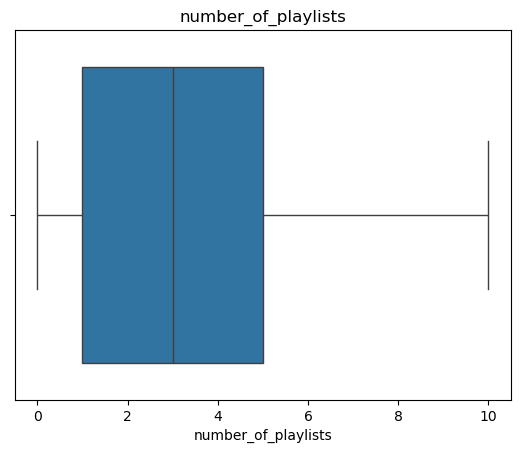

In [35]:
#number_of_playlists
sns.boxplot(data = data , x = "number_of_playlists" )
plt.title("number_of_playlists")

In [ ]:
# Résumé de la distribution du nombre de playlists
#1 .Médiane : La médiane semble se situer autour de 3 playlists, ce qui indique que la moitié des utilisateurs ont 
# moins de 3 playlists et l'autre moitié en a plus.
#2. Étendue : La majorité des valeurs se trouvent entre 0 et 5 playlists, mais la valeur maximale atteint 10. 
# Cela suggère quelques utilisateurs très actifs (valeurs élevées).
#3. Quartiles : Le premier quartile (Q1) est autour de 1 playlist, et le troisième quartile (Q3) est autour de 5 playlists. 
#Cela indique une légère asymétrie vers les valeurs plus faibles.
#4. Outliers : Aucun outlier évident n’est détecté, la distribution semble relativement régulière sans valeurs extrêmes isolées.

Text(0.5, 1.0, 'skips_per_day')

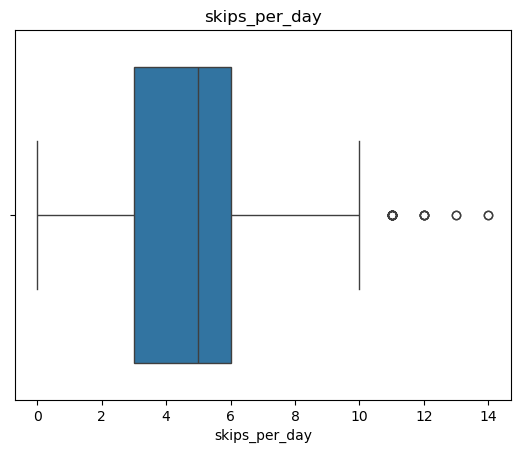

In [36]:
#skips_per_day
sns.boxplot(data = data , x = "skips_per_day" )
plt.title("skips_per_day")

In [ ]:
#Résumé interprétation du boxplot "skips_per_day"
#Médiane autour de 5 skips par jour.
#La majorité des valeurs se situent entre ≈3 et 6 skips par jour (Q1-Q3).
#Distribution légèrement asymétrique vers les valeurs élevées.
#Moustaches de ≈0 à 10 skips par jour, indiquant une dispersion modérée.
#Quelques valeurs aberrantes à droite (>10) à surveiller.

Text(0.5, 1.0, 'days_since_last_login')

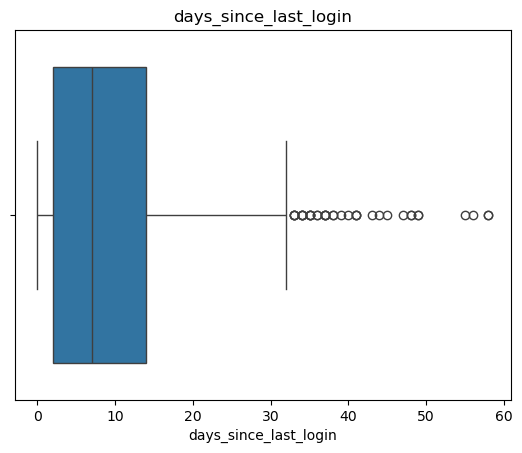

In [38]:
#days_since_last_login
sns.boxplot(data = data , x = "days_since_last_login" )
plt.title("days_since_last_login")

In [41]:
#Résumé interprétation du boxplot "days_since_last_login"
#Médiane autour de 10 jours.
#La majorité des valeurs se situent entre ≈3 et 23 jours (Q1-Q3).
#Distribution asymétrique à droite (longue queue vers les valeurs élevées).
#Moustaches de ≈0 à 33 jours, indiquant une dispersion modérée.
#Plusieurs valeurs aberrantes à droite (>33 jours) à surveiller.

In [39]:
#les variable churned et support_tickets contient deux valeures , 3 valeurs respectivement   donc il n'exist pas de valeurs abberantes.

### 7. Étudiez les relations entre variables quantitatives : 

In [100]:
#matrice de correlation 
numeric_cols = ['avg_daily_minutes', 'number_of_playlists', 'skips_per_day', 
                'support_tickets', 'days_since_last_login', 'churned']
df_numeric = data[numeric_cols]
corr_matrix = df_numeric.corr(method="spearman")
corr_matrix

,avg_daily_minutes,number_of_playlists,skips_per_day,support_tickets,days_since_last_login,churned
avg_daily_minutes,1.000000,0.409702,0.069296,0.031297,0.027664,-0.287629
number_of_playlists,0.409702,1.000000,-0.027437,-0.045466,-0.046729,-0.181838
skips_per_day,0.069296,-0.027437,1.000000,-0.016343,0.013515,-0.045638
support_tickets,0.031297,-0.045466,-0.016343,1.000000,-0.025025,0.224244
days_since_last_login,0.027664,-0.046729,0.013515,-0.025025,1.000000,0.135563
churned,-0.287629,-0.181838,-0.045638,0.224244,0.135563,1.000000


<Axes: >

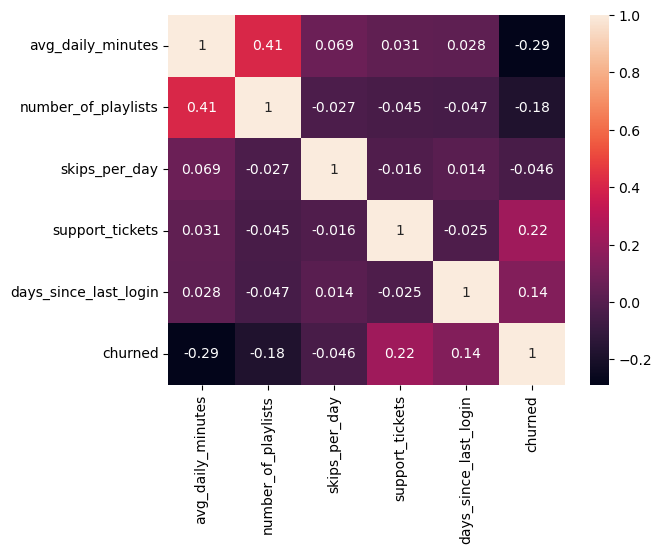

In [101]:
#heatmap
sns.heatmap(data = corr_matrix , annot=True)

In [102]:
#on observe que il exist une correlation positif entre number_of_playlists et avg_daily_minutes (40%) 
#une faible correlation negatif entre churned  et avg_daily_minutes (29%)
#une faible correlation positif entre churned  et support_tickets (23%)
#une faible correlation negatif entre churned  et number_of_playlists (19%)
#une faible correlation positif  entre churned et days_since_last_login (14%)

### Analyse Graphique entre la variable cible et les variables explicatives

<Axes: xlabel='churned', ylabel='avg_daily_minutes'>

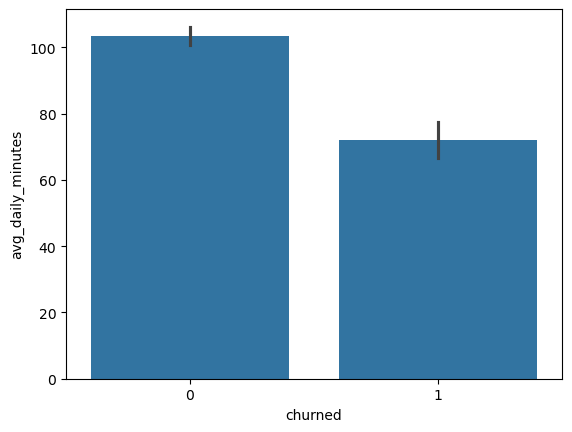

In [76]:
sns.barplot(data = data , x = "churned" , y ="avg_daily_minutes" )

In [ ]:
#on observe que plus le nombre de miniutes augmente  plus la probabilité de quitter diminue.

<Axes: xlabel='churned', ylabel='number_of_playlists'>

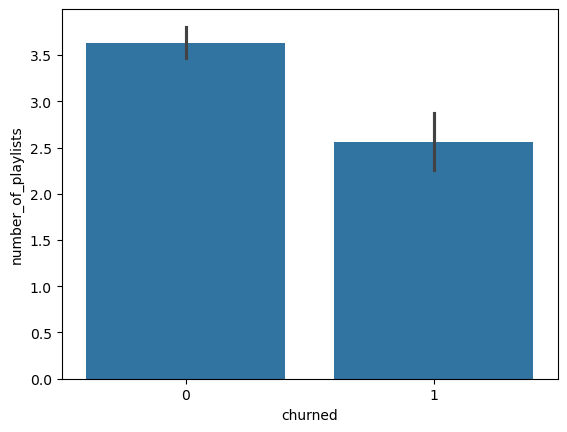

In [74]:
sns.barplot(data = data , x = "churned" , y ="number_of_playlists")

In [ ]:
#on observe que plus le nombre des playlists augmente  plus la probabilité de quitter diminue.

<Axes: xlabel='churned', ylabel='days_since_last_login'>

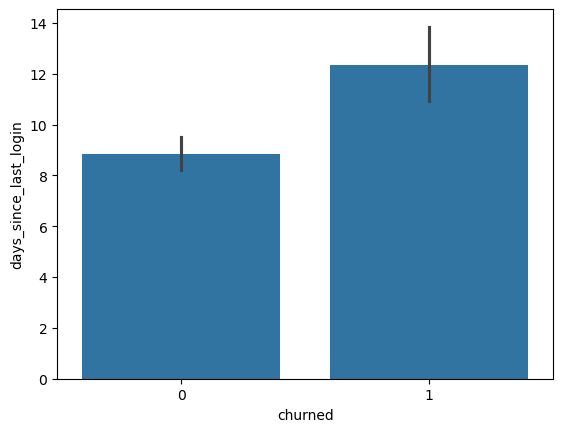

In [103]:
sns.barplot(data = data , x = "churned" , y ="days_since_last_login")

In [104]:
#on observe que les personnes qui ont "Nombre de jours écoulés depuis la dernière connexion de l’utilisateur" elevé partent le plus souvent.

<Axes: xlabel='churned', ylabel='count'>

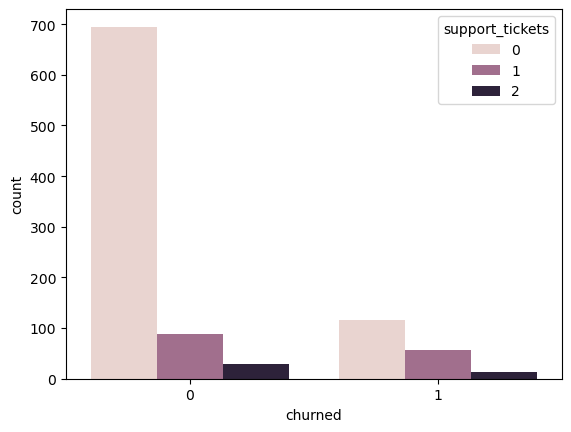

In [85]:
sns.countplot(data = data , x = "churned" , hue ="support_tickets")

In [ ]:
#on observe que les personnes qui ont support ticket 0 partent  le moins.

In [86]:
data.head()

,user_id,subscription_type,country,avg_daily_minutes,number_of_playlists,top_genre,skips_per_day,support_tickets,days_since_last_login,churned
0,user_1,Premium,US,134.9,4,Electronic,6,0,1,0
1,user_2,Premium,PK,165.7,5,Pop,8,0,12,0
2,user_3,Free,DE,45.9,3,Classical,3,0,3,0
3,user_4,Premium,PK,106.0,0,Jazz,7,0,3,0
4,user_5,Premium,US,89.6,5,Country,2,1,6,0


<Axes: xlabel='churned', ylabel='count'>

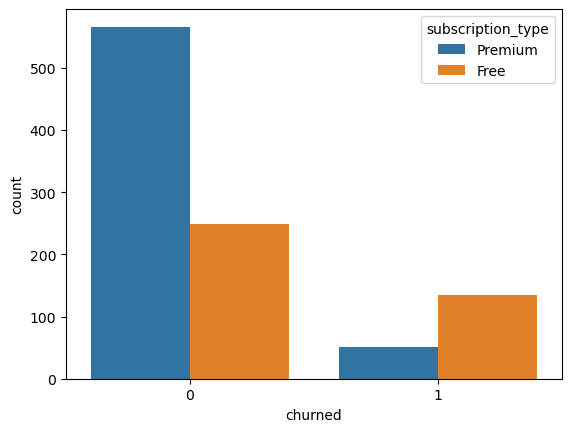

In [87]:
sns.countplot(data = data , x = "churned" , hue = "subscription_type")

In [88]:
#on observe que les personnes qui ont subscription_type Premium partent  le moins.

<Axes: xlabel='churned', ylabel='count'>

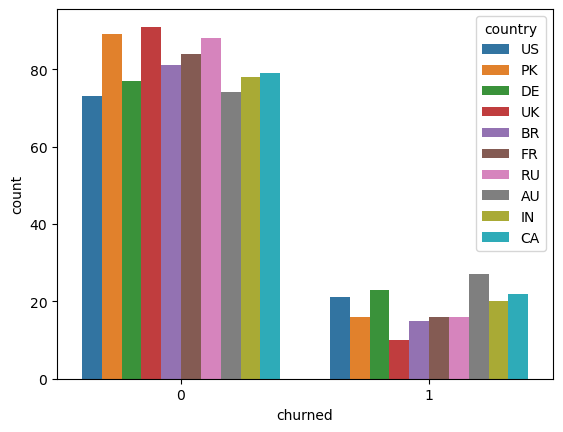

In [91]:
sns.countplot(data = data , x = "churned" , hue = "country")

In [92]:
#on observe que ukraine est le pays qui ne quitte  pas par rapport aux autres.

<Axes: xlabel='churned', ylabel='count'>

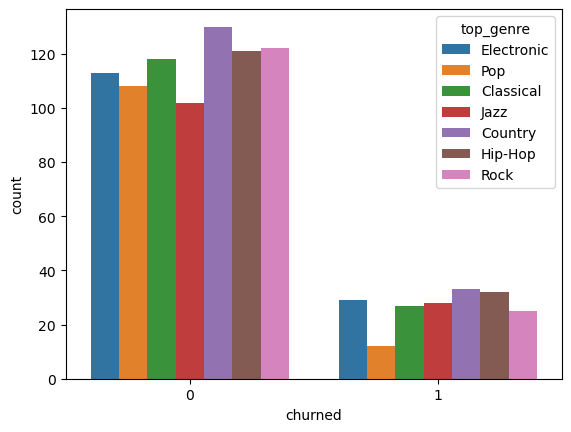

In [93]:
sns.countplot(data = data , x = "churned" , hue = "top_genre")